In [1]:
import matplotlib.pyplot as plt
import numpy as np
from winter_golden_cave import WinterGoldenCave, Action

In [158]:
env = WinterGoldenCave(width=8, height=8, hole_num=8, coin_num=8, rand_seed=1000)
print(env)

SFFFFFFH
FFFFFFCF
HFFFFHHF
FFFFFFFF
HFFFCFHC
FFFCFFFC
FCCFFCFH
FFHFFFFG


In [3]:
def value_iteration(A, S, T, R, V, P, y=0.9, e=0.0001):
    """
    A: action space (range)
    S: state space (range)
    T: transition function (numpy array which has size of SxAxS)
    R: reward function (numpy array which has size of S)
    V: value function to optimize (numpy array which has size of S)
    P: policy to optimize (numpy array which has size of S)
    y: gamma (learning rate)
    e: error threshold
    """
    done = False
    while not done:
        _V = np.array([[ sum([ T[s][a][_s]*(R[s]+y*V[_s]) for _s in S ]) for a in A ] for s in S])
        Vp = np.max(_V, axis=1)
        done = max(abs(V-Vp)) < e
        np.copyto(V, Vp)
    np.copyto(P, np.argmax(_V, axis=1))

In [16]:
def policy_iteration(A, S, T, R, V, P, y=0.9, e=0.0001):
    """
    A: action space (range)
    S: state space (range)
    T: transition function (numpy array which has size of SxAxS)
    R: reward function (numpy array which has size of S)
    V: value function to optimize (numpy array which has size of S)
    P: policy to optimize (numpy array which has size of S)
    y: gamma (learning rate)
    e: error threshold
    """
    done = False
    while not done:
        while not done:
            _V = np.array([[ sum([ T[s][a][_s]*(R[s]+y*V[_s]) for _s in S ]) for a in A ] for s in S])
            Vp = _V[S, P[S]]
            done = max(abs(V-Vp)) < e
            np.copyto(V, Vp)
        _P = np.argmax(_V, axis=1)
        done = np.array_equal(P, _P)
        np.copyto(P, _P)

In [5]:
def solve(env, P, max_step):
    s = env.reset()
    history = [env.state2pos(s)]
    done = False
    r_sum = 0
    step = 0
    while not done and step < max_step:
        s, r, done = env.step(P[s])
        history.append(env.state2pos(s))
        r_sum += r
        step += 1
    row_hist = list(map(lambda pos: pos[0], history))
    col_hist = list(map(lambda pos: pos[1], history))
    return row_hist, col_hist, done

In [6]:
def as_map(a):
    return a.reshape((env.height, env.width))

In [157]:
def view(env, V, P):
    rows, cols, done = solve(env, P, len(env.state_space))
    fig, ax = plt.subplots(1, 3, figsize=(12, env.height/env.width*4))
    im = ax[0].matshow(as_map(V))
    fig.colorbar(im, ax=ax[0])
    ax[0].plot(cols, rows, c='red')
    ax[0].set_title('value function', y=1.12)

    im = ax[1].matshow(as_map(env.R))
    fig.colorbar(im, ax=ax[1])
    ax[1].set_title('reward function', y=1.12)
    
    act2vec = {
        Action.LEFT: (-1, 0),
        Action.RIGHT: (1, 0),
        Action.UP: (0, 1),
        Action.DOWN: (0, -1),
    }

    ax[2].matshow(as_map(V))
    ax[2].quiver([ s%env.width for s in env.state_space ], 
               [ s//env.width for s in env.state_space ], 
               [ act2vec[P[s]][0] for s in env.state_space ],
               [ act2vec[P[s]][1] for s in env.state_space ],
              color='red')
    ax[2].set_title('policy', y=1.12)
    
    plt.tight_layout()
    plt.show()

In [137]:
def train(env, method):
    V = np.zeros(len(env.state_space))
    P = np.random.randint(len(env.action_space), size=len(env.state_space))
    method(env.action_space, env.state_space, env.T, env.R, V, P)
    return V, P

### ペナルティが無い場合

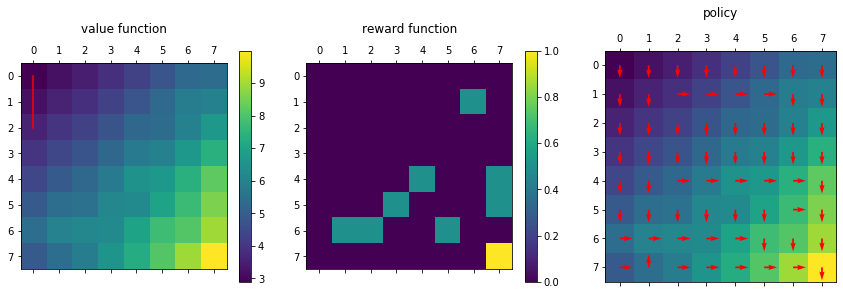

In [159]:
env.set_rewards(F=0, H=0, C=0.5, G=1)
V, P = train(env, method=value_iteration)
view(env, V, P)

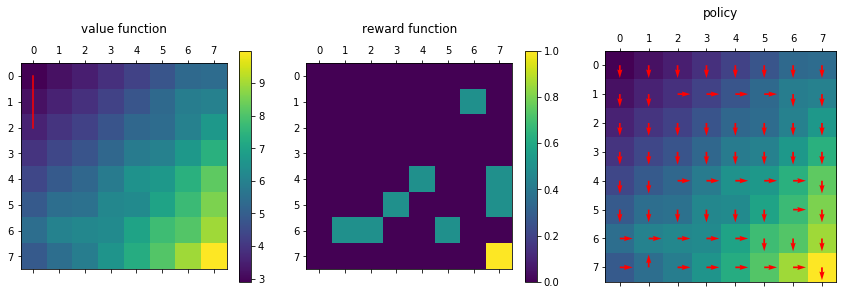

In [142]:
env.set_rewards(F=0, H=0, C=0.5, G=1)
V, P = train(env, method=policy_iteration)
view(env, V, P)

### ペナルティが有る場合

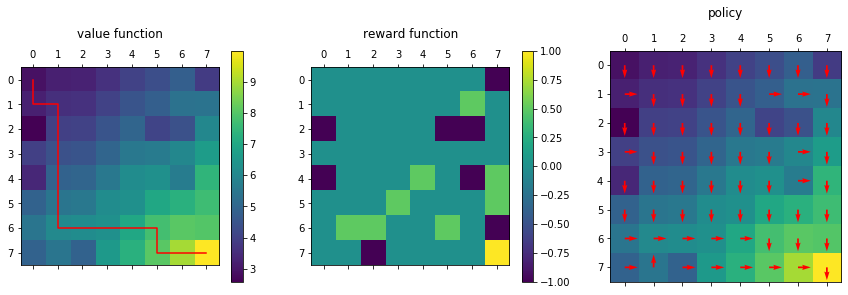

In [139]:
env.set_rewards(F=0, G=1, H=-1, C=0.5)
V, P = train(env, method=value_iteration)
view(env, V, P)

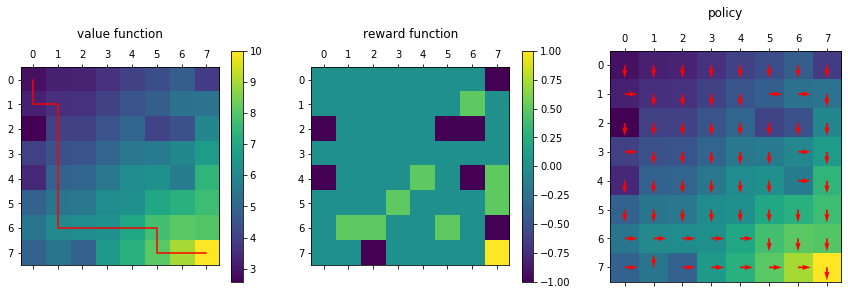

In [143]:
env.set_rewards(F=0, G=1, H=-1, C=0.5)
V, P = train(env, method=policy_iteration)
view(env, V, P)

### ゴール出来なくなる例

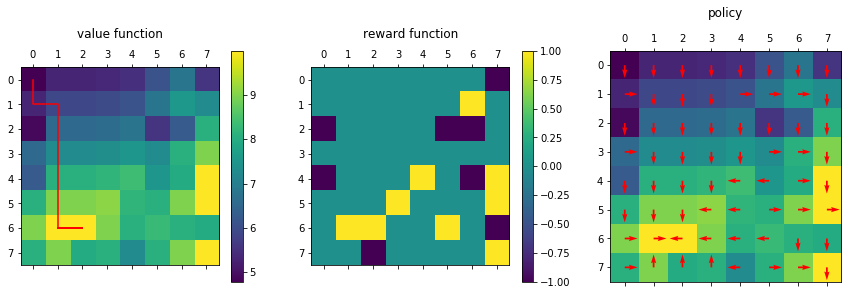

In [147]:
env.set_rewards(F=0, G=1, H=-1, C=1)
V, P = train(env, method=value_iteration)
view(env, V, P)

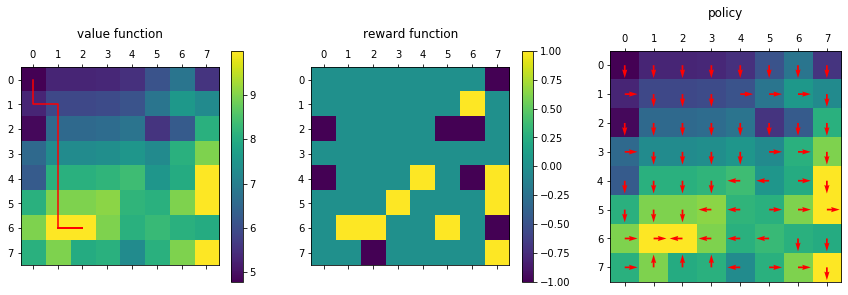

In [150]:
env.set_rewards(F=0, G=1, H=-1, C=1)
V, P = train(env, method=policy_iteration)
view(env, V, P)